In [1]:
import PIL.Image
import numpy as np
from typing import Union
from glob import glob
import pandas as pd
import os
from treys import Card
from termcolor import colored
from utils import eval_listof_games , debug_listof_games, save_results , load_results


from preprocessing import *



processing img 0:
-- 0.329 seconds to load image
---- 1.620 seconds to register table
---- 0.531 seconds to equalize table
---- 0.748 seconds to extract players
---- 0.000 seconds to extract table cards
---- 1.144 seconds to extract and count chips
-- 4.044 seconds to segment image
-- 6.037 seconds to save images


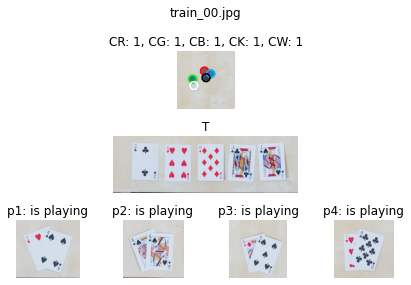


processing img 1:
-- 0.271 seconds to load image
---- 1.555 seconds to register table
---- 0.474 seconds to equalize table
---- 0.714 seconds to extract players
---- 0.000 seconds to extract table cards
---- 1.030 seconds to extract and count chips
-- 3.785 seconds to segment image
-- 5.690 seconds to save images


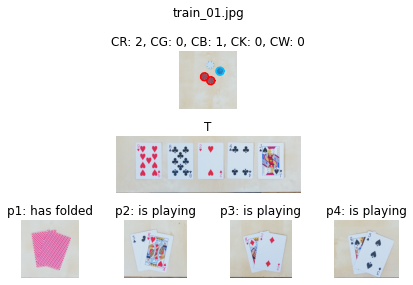

In [2]:
#demonstration of "preprocessing.py"

# to process an image for the first time run the following cell :  

# for n in training_set:        #to do the whole dataset of 28 images
for n in [0, 1] : 
    
    print("\nprocessing img %d:" % n)
    
    tic = time.time()
    img =  get_img(n)[::2,::2,:]
    print("-- %.3f seconds to load image" % (time.time() - tic))

    tic = time.time()
    segments = TableSegments(img)
    print("-- %.3f seconds to segment image" % (time.time() - tic))

    tic = time.time()
    segments.save(n)
    print("-- %.3f seconds to save images" % (time.time() - tic))

    segments.show("train_{}.jpg".format(str(n).zfill(2)))
    plt.show()

processing img 0
-- 0.049 seconds to load image
---- 0.705 seconds to extract players
---- 0.000 seconds to extract table cards
---- 1.122 seconds to extract and count chips
-- 1.839 seconds to segment image


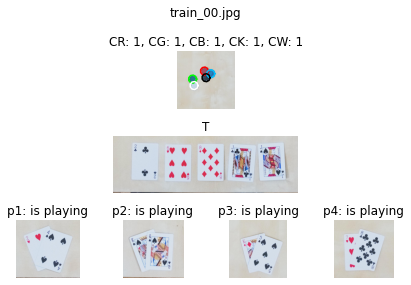

processing img 1
-- 0.045 seconds to load image
---- 0.671 seconds to extract players
---- 0.000 seconds to extract table cards
---- 1.100 seconds to extract and count chips
-- 1.771 seconds to segment image


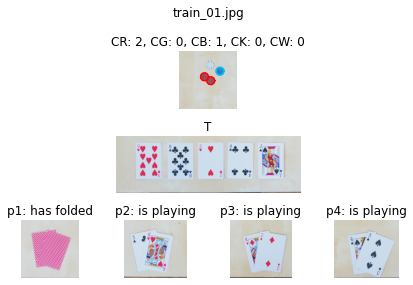

In [3]:
# once an image has been processed and saved locally, you can 
# load from a past 'checkpoint' and save a bit of time

#for n in training_set: 
for n in [0, 1] : 
    
    print("processing img %d" % n)
    
    tic = time.time()
    img =  get_img(n, img_type='table_eq')
    print("-- %.3f seconds to load image" % (time.time() - tic))
    
    tic = time.time()
    segments = TableSegments(img, is_registered=True, is_equalized=True)
    print("-- %.3f seconds to segment image" % (time.time() - tic))
    
    segments.show("train_{}.jpg".format(str(n).zfill(2)))
    plt.show()